<a href="https://colab.research.google.com/github/GetAyanatGit/BandelHowrahSignalAudit/blob/main/BandelHowrahSignalAudit/Railway_Route_Analysis/Bandel_Howrah%20/BandelHowrahSignalAudit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

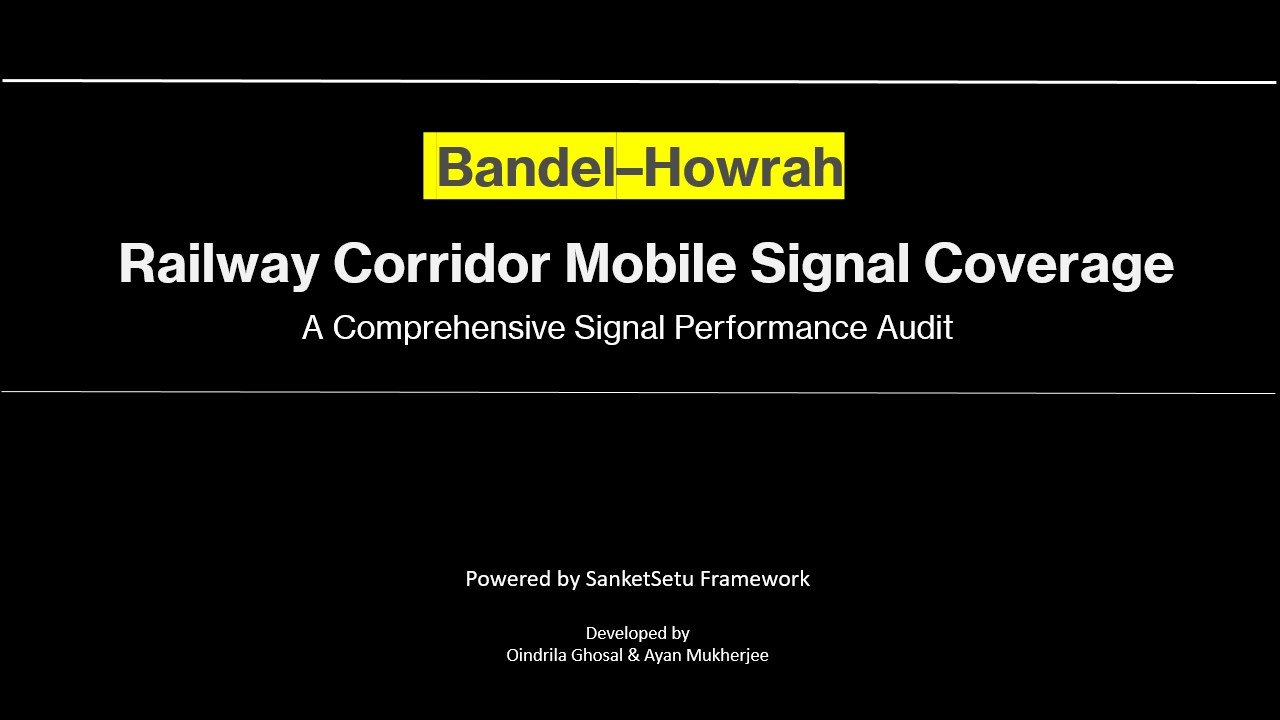

# Technology Stack

This project leverages robust and modern technologies across data collection, analysis, and presentation:

- **AI Assistance:**  
  Utilizes Perplexity AI and GitHub Copilot for advanced research, code generation, and data interpretation.

- **Cloud Computing:**  
  Analysis and visualization performed in Google Colab, enabling scalable and collaborative workflows.

- **Programming Language:**  
  Implemented in Python for reliable processing, automation, and visualization tasks.

- **Mobile Data Collection:**  
  Real-world data captured using PyDroid 3 on Android smartphones, powered by custom-built Kivy and Plyer modules for seamless logging of GPS and network metrics.

This integrated stack ensures end-to-end efficiency: from intelligent code assistance and accurate field data acquisition to scalable analysis and clear results presentation.


# Notebook Purpose

The primary aim of this notebook is to systematically uncover and present mobile signal strength realities along the Bandel–Howrah railway corridor using data collected by **SanketSetu**, a custom smartphone app built with Kivy and PyDroid. This logger app captures GPS and cellular network metrics on-the-go, enabling an authentic, data-driven snapshot of Airtel and Jio network performance at every station and segment—revealing blackspots, strengths, and signal drops critical to passenger connectivity.

---

## SanketSetu: A Portable Framework for Cellular Network Analysis  

**SanketSetu** stands out as a **cost-free, portable, and fully smartphone-based platform** for analyzing cellular network quality. Unlike traditional survey tools that rely on specialized hardware or expensive software, SanketSetu leverages only an **Android smartphone** with lightweight, open-source libraries.  

### Key Specialities  
- **No Extra Hardware Required**  
  Entirely built and executed on a standard Android smartphone – eliminating the need for costly equipment or proprietary sensors.  

- **Zero Cost Implementation**  
  Developed using free, open-source frameworks such as **Pydroid 3**, **Kivy**, and **Plyer**, ensuring accessibility for students, researchers, and enthusiasts without financial barriers.  

- **Custom-Built Data Collection App**  
  A tailor-made application was designed and deployed directly on the smartphone, enabling seamless recording of signal strength and location data in real time.  

- **Cloud-Powered Insights**  
  Data collected along train routes (e.g., **Bandel–Howrah corridor**) is processed via cloud services, producing **demographic heat maps** and **operator-wise performance comparisons** (e.g., Airtel vs. Jio).  

- **Scalable & Portable**  
  The approach is **replicable across any commuter route**, making it a proof of concept for **large-scale, data-driven network planning** and **commuter-centric awareness**.  

### Why It Matters  
SanketSetu demonstrates how **innovative use of existing devices** can democratize cellular network analysis—turning everyday smartphones into powerful tools for **telecom research and optimization**.

<br>
<br>

# Data Collection: Native Mobile-Only Solution

A unique strength of this project lies in its **completely phone-native data collection app**, built using Python frameworks (Kivy and Plyer) and running directly on an Android smartphone via PyDroid 3. Unlike traditional telecom measurement setups that require specialized hardware or complex software environments, this approach leverages the power of the handset itself—no external equipment, no desktop apps, no server dependencies.

---

### Why Mobile-Only Matters

- **True Mobility:**  
  The entire data logger runs fully on the smartphone, enabling seamless, on-the-go measurements during travel without tethering to other devices.

- **Cost Efficiency:**  
  No expensive hardware units or sensors are needed. Any Android phone running PyDroid can transform into a professional-grade telecom logger.

- **Instant Deployment:**  
  The app installs and executes on the device alone, supporting rapid testing and flexible data gathering in diverse locations.

- **Self-Contained Reliability:**  
  Data is written to local memory in real-time. Even if the phone crashes or loses network connectivity, logging continues safely without loss.

---

### Additional Highlights

- GPS accuracy fine-tuned to ±10 meters, with average accuracy of ***4.07*** meters for precise geo-tagging.

- Data size remains minimal at ***0.3*** MB for the entire Bandel–Howrah route, facilitating easy storage and transfer.

- Battery consumption optimized to only ***19 %*** drop over the ***43.5*** km journey by minimizing unnecessary I/O and leveraging write flush techniques.

- Real-time telephony data access through Android’s Telephony Manager interface, bridging Python with native Android JVM capabilities.

---

### Looking Ahead

This mobile-first solution is designed for efficiency, portability, and robustness. We plan to further enhance the user interface and expand features while maintaining the core philosophy of phone-native, lightweight, and powerful data collection. The entire app codebase and project files will be maintained openly on GitHub for community use and development.

---
<br>
<br>

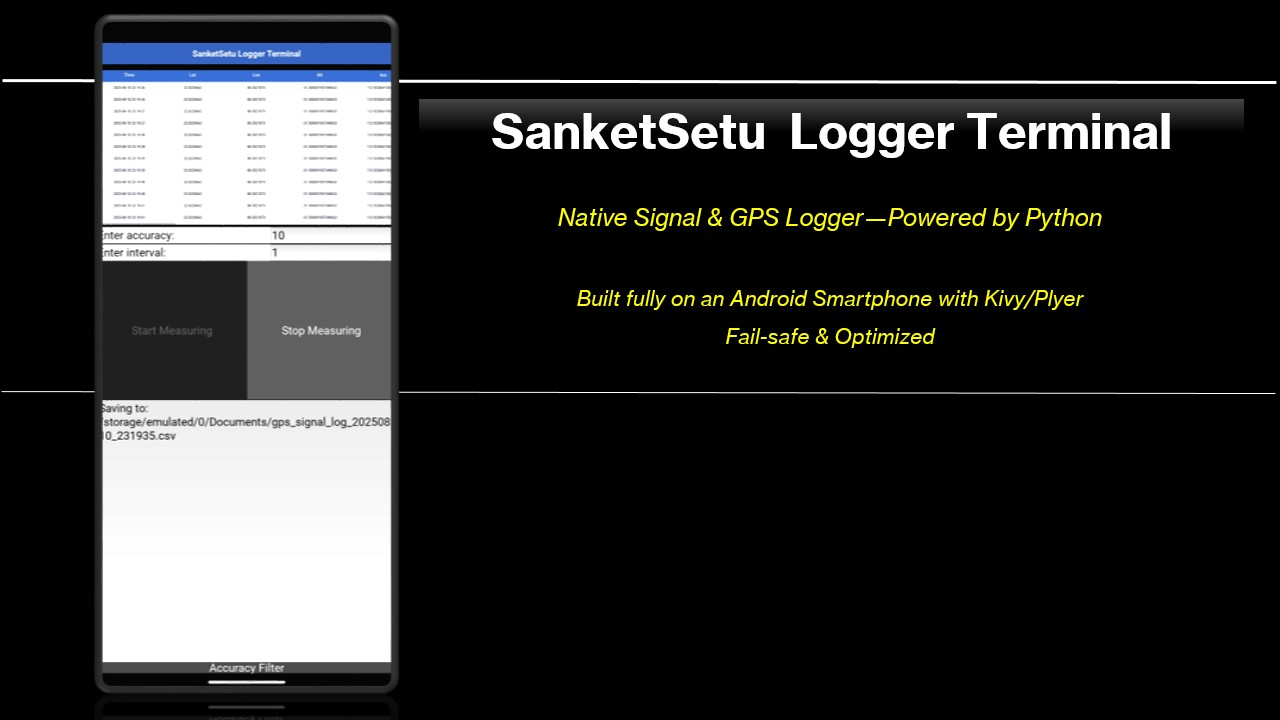
<br>
<br>


# Bandel–Howrah Railway Route Signal Quality Analysis


# References & Key Definitions

| Metric      | Description                                                                                  | Typical Good Range             | Typical Poor Range              |
|-------------|----------------------------------------------------------------------------------------------|-------------------------------|-------------------------------|
| **dBm**     | Decibel-milliwatts; measures the power level of the received signal at the device antenna.  | -70 dBm or higher (strong signal) | Below -90 dBm (weak signal)     |
| **RSRP**    | Reference Signal Received Power; the average power level of LTE reference signals received.  | -80 dBm or higher (good coverage) | Below -100 dBm (poor coverage)  |
| **RSRQ**    | Reference Signal Received Quality; indicates signal quality by comparing RSRP and noise.    | Between -10 dB and -3 dB (good quality) | Less than -15 dB (poor quality) |

---
<br>

### Notes:

- **dBm** and **RSRP** both indicate signal strength; higher (less negative) values represent stronger signals and better connectivity.
- **RSRQ** measures the quality and reliability of the signal, considering interference and noise—the closer to zero, the better.
- These parameters are critical for evaluating mobile network performance and user experience on the Bandel–Howrah railway route.
<br>
<br>



## 1. Data Import, Cleaning, and Operator Mapping

- Creating a Spark session to load a large GPS signal log CSV file efficiently.
- Cleaning the data by removing duplicate records and rows with missing critical fields (Time, Latitude, Longitude).
- Renaming columns for consistency and clarity.

- Mapping the "Unknown" operator to "Jio" to unify operator naming.
- Counting records for Airtel and Jio to understand data distribution.
- Generating summary statistics of key signal-related numerical columns to grasp data characteristics.
<br>
<br>

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import requests

# Initialize Spark session
spark = SparkSession.builder.appName("GPS Signal Log Loader").getOrCreate()

# Google Drive file download setup
file_id = "1-rXCuaPZA7S_ZOQJOqHDVPGujZ062vEi"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"
local_path = "/tmp/gps_signal_log.csv"

# Download file from Google Drive to local path
response = requests.get(download_url)
with open(local_path, "wb") as f:
    f.write(response.content)

# Load CSV into Spark DataFrame from local file
df = spark.read.csv(local_path, header=True, inferSchema=True)
df.printSchema()

# Data cleaning
df = df.dropDuplicates()
df = df.dropna(subset=["Time", "Lat", "Lon"])

# Rename columns
df = (df.withColumnRenamed("Bat%", "Battery")
        .withColumnRenamed("OpName", "Operator"))

# Display record counts
print("Total Records:", df.count())

df_airtel = df.filter(col("Operator") == "Airtel")
df_jio = df.filter(col("Operator") == "Unknown")  # Treat 'Unknown' as 'Jio'

print("Airtel Records:", df_airtel.count())
print("Jio (Unknown) Records:", df_jio.count())

# Summary statistics for key columns
df.describe(["dBm", "ASU", "Lvl", "RSRP", "RSRQ", "Spd", "Battery"]).show()


root
 |-- Time: timestamp (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Alt: double (nullable = true)
 |-- Acc: double (nullable = true)
 |-- Spd: double (nullable = true)
 |-- Bear: double (nullable = true)
 |-- dBm: double (nullable = true)
 |-- ASU: double (nullable = true)
 |-- Lvl: double (nullable = true)
 |-- RSRP: double (nullable = true)
 |-- RSRQ: double (nullable = true)
 |-- SINR: double (nullable = true)
 |-- OpCode: double (nullable = true)
 |-- OpName: string (nullable = true)
 |-- Slot: string (nullable = true)
 |-- Bat%: double (nullable = true)
 |-- Chg: boolean (nullable = true)

Total Records: 2278
Airtel Records: 1138
Jio (Unknown) Records: 1139
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+
|summary|               dBm|               ASU|               Lvl|              RSRP|               RSRQ|               Spd|          B

# Key Metrics Overview

This section presents a concise summary of important metrics computed from the GPS signal log data collected along the Bandel–Howrah railway route:

- **Total Distance Travelled (km):**  
  The cumulative distance covered during data collection, calculated using the haversine formula on consecutive GPS points.

- **Average Speed (km/h):**  
  The average speed throughout the journey, converted from meters per second to kilometers per hour, representing actual movement pace.

- **Battery Drain (%):**  
  The total battery percentage consumed during the data collection period, reflecting device power usage.

- **Battery Drain Rate (% per hour):**  
  The average rate of battery consumption per hour, based on the time elapsed between the first and last recorded data points.

These key metrics provide a clear snapshot of the journey’s movement and resource consumption characteristics.
<br>
<br>

In [7]:
import plotly.graph_objects as go
from pyspark.sql.functions import min as spark_min, max as spark_max, col, unix_timestamp
import pandas as pd
import numpy as np

# Extract required columns as pandas dataframe, including accuracy 'Acc'
pdf = df.select("Lat", "Lon", "Time", "Battery", "Spd", "Acc").orderBy("Time").toPandas()

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Calculate distance between consecutive points
pdf['dist_km'] = haversine(
    pdf['Lat'].shift(1), pdf['Lon'].shift(1),
    pdf['Lat'], pdf['Lon']
)
pdf['dist_km'] = pdf['dist_km'].fillna(0)  # Avoid future warning by reassignment instead of inplace fillna

total_distance = pdf['dist_km'].sum()

# Calculate average speed in km/h (Spd in m/s)
avg_speed_mps = pdf['Spd'].mean()
avg_speed_kmph = avg_speed_mps * 3.6

# Calculate battery drain and battery drainage rate
min_battery = pdf['Battery'].min()
max_battery = pdf['Battery'].max()
battery_drain = max_battery - min_battery

# Calculate total time in hours between min and max timestamps
start_time = pdf['Time'].min()
end_time = pdf['Time'].max()
duration_hours = (end_time - start_time).total_seconds() / 3600

battery_drain_rate = battery_drain / duration_hours if duration_hours > 0 else None

# Calculate average GPS accuracy (column 'Acc') in meters
avg_accuracy = pdf['Acc'].mean()

# Prepare values as floats for Plotly Indicator
total_distance_val = round(total_distance, 2)
avg_speed_val = round(avg_speed_kmph, 2)
battery_drain_val = round(battery_drain, 2)
battery_drain_rate_val = round(battery_drain_rate, 2) if battery_drain_rate else 0
avg_accuracy_val = round(avg_accuracy, 2) if not np.isnan(avg_accuracy) else None

# Build KPI cards visualization using plotly
fig = go.Figure()

kpis = [
    {"title": "Total Distance Travelled", "value": total_distance_val, "unit": "km", "color": "#1f77b4"},
    {"title": "Average Speed", "value": avg_speed_val, "unit": "km/h", "color": "#ff7f0e"},
    {"title": "Battery Drain", "value": battery_drain_val, "unit": "%", "color": "#2ca02c"},
    {"title": "Battery Drain Rate", "value": battery_drain_rate_val, "unit": "% / hr", "color": "#d62728"},
    {"title": "Average GPS Accuracy", "value": avg_accuracy_val, "unit": "meters", "color": "#9467bd"},
]

# Adjust domain for 5 KPIs horizontally
for i, kpi in enumerate(kpis):
    fig.add_trace(go.Indicator(
        mode="number",
        value=kpi["value"] if kpi["value"] is not None else 0,
        title={"text": f"{kpi['title']}<br><span style='font-size:0.8em;color:gray'>{kpi['unit']}</span>", "font": {"size": 18}},
        domain={'x': [0.05 + i*0.18, 0.18 + i*0.18], 'y': [0, 1]},
        number={'font': {'size': 28, 'color': kpi["color"]}},
    ))

fig.update_layout(
    grid={'rows': 1, 'columns': 5, 'pattern': "independent"},
    margin=dict(t=30, l=20, r=20, b=20),
    height=180,
    paper_bgcolor="white",
    font=dict(family="Arial", size=14)
)

fig.show()


## 2. Conversion to Pandas DataFrame, Time Parsing, and Initial Signal Strength Visualization

- Converting the Spark DataFrame to a Pandas DataFrame for flexible analysis and interactive visualization.
- Parsing the 'Time' column to datetime format and sorting by time.
- Creating an interactive line chart showing signal strength (dBm) over time, colored by operator.
- Adding horizontal reference lines to mark thresholds for good and weak signal strength.
- Dynamically setting the y-axis range based on signal strength values.


In [65]:
import pandas as pd
import plotly.express as px

# Convert Spark DataFrame to Pandas
pdf = df.toPandas()

# Map 'Unknown' to 'Jio' for clarity
pdf['Operator'] = pdf['Operator'].replace('Unknown', 'Jio')

# Parse and sort time
pdf['Time'] = pd.to_datetime(pdf['Time'])
pdf = pdf.sort_values('Time')

# Create line chart for signal strength over time by operator
fig = px.line(
    pdf,
    x='Time',
    y='dBm',
    color='Operator',
    title="Signal Strength (dBm) Over Time – Bandel to Howrah",
    labels={'dBm': 'Signal Strength (dBm)', 'Time': 'Time'},
    color_discrete_map={'Airtel': 'red', 'Jio': 'blue'}
)

# Add reference lines for good and weak signal thresholds
fig.add_hline(y=-70, line_dash="dash", line_color="green", annotation_text="Good signal", annotation_position="bottom right")
fig.add_hline(y=-90, line_dash="dash", line_color="gray", annotation_text="Weak signal", annotation_position="bottom right")

# Adjust y-axis range dynamically
fig.update_layout(yaxis_range=[pdf['dBm'].min() - 5, 0])

fig.show()


### Observation:

- Both Airtel (red) and Jio (blue) show considerable fluctuations in signal strength during the Bandel to Howrah journey.
- At most times, signal strength for both operators remains below the "Good Signal" threshold (-70 dBm), with frequent dips below the "Weak Signal" threshold (-90 dBm).
- Jio exhibits sharper and more abrupt drops, occasionally reaching noticeably weaker levels than Airtel.
- Airtel, while also variable, appears more stable during some stretches, but neither operator consistently maintains strong signal quality.
- Overall, passengers(especially Jio) may experience intermittent weak connectivity throughout the route, with performance gaps appearing at various time intervals for both operators.
<br>
<br>



## 3. Mapping the Journey: Interactive Route Map Visualization

- Creating an interactive geographic map to visualize the train’s journey using latitude and longitude data points.
- Marker color indicates signal strength: green for strong, orange for moderate, red for weak.
- Grouping markers by SIM operator (Airtel/Jio) for easier layer control.
- Adding an animated path to trace the entire journey from Bandel to Howrah.
- Saving the map as an HTML file for further exploration.


In [64]:
import folium
from folium.plugins import AntPath

# Calculate map center
lat_center = pdf['Lat'].mean()
lon_center = pdf['Lon'].mean()
m = folium.Map(location=[lat_center, lon_center], zoom_start=12, tiles="OpenStreetMap")

# Function to pick marker color based on dBm value
def signal_color(dbm):
    if dbm >= -70:
        return "green"
    elif dbm >= -90:
        return "orange"
    else:
        return "red"

# Separate feature groups for Airtel and Jio
airtel_group = folium.FeatureGroup(name="Airtel")
jio_group = folium.FeatureGroup(name="Jio")

# Airtel points: markers are red for Airtel, colored by signal strength
for _, row in pdf[pdf['Operator'] == 'Airtel'].iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=9,
        color=signal_color(row['dBm']),
        fill=True,
        fill_opacity=0.9,
        popup=f"Airtel | {row['dBm']} dBm | {row['Time']}"
    ).add_to(airtel_group)

# Jio points: markers are blue for Jio, colored by signal strength
for _, row in pdf[pdf['Operator'] == 'Jio'].iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=4,
        color=signal_color(row['dBm']),
        fill=True,
        fill_opacity=0.7,
        popup=f"Jio | {row['dBm']} dBm | {row['Time']}"
    ).add_to(jio_group)

# Add feature groups to the map
airtel_group.add_to(m)
jio_group.add_to(m)

# Animated route path for the journey
coords = list(zip(pdf['Lat'], pdf['Lon']))
AntPath(coords, color="blue", weight=2.5, opacity=0.7).add_to(m)

# Layer control for operator visibility
folium.LayerControl(collapsed=False).add_to(m)

# Save map as HTML file
m.save("bandel_howrah_signal_map_filtered.html")

m


## 4. Exploring Signal Strength Trends with Train Speed

- Analyzing the relationship between train speed and signal strength for each operator.
- Calculating linear regression trendlines to identify how signal strength varies with speed.
- Plotting trendlines for Airtel (red) and Jio (blue) to compare their performance under different speeds.


In [66]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

for operator, line_color in [('Airtel', 'red'), ('Jio', 'blue')]:
    subset = pdf[pdf['Operator'] == operator]
    if len(subset) > 1:
        z = np.polyfit(subset['Spd'], subset['dBm'], 1)
        p = np.poly1d(z)
        trend_x = np.linspace(subset['Spd'].min(), subset['Spd'].max(), 100)
        trend_y = p(trend_x)
        fig.add_trace(go.Scatter(
            x=trend_x,
            y=trend_y,
            mode='lines',
            name=f'{operator} Trendline',
            line=dict(color=line_color, width=4)
        ))

fig.update_layout(
    title='Train Speed vs Signal Strength (dBm) - Trendlines by Operator',
    xaxis_title='Speed (Spd)',
    yaxis_title='Signal Strength (dBm)',
    template='plotly_white',
    legend=dict(font=dict(size=14))
)

fig.show()


### Observation:

- Airtel's (red) signal strength decreases noticeably as train speed increases, showing a clear negative trend.
- Jio's (blue) signal remains almost constant regardless of whether the train is moving slow or fast.
- At lower speeds, Airtel generally provides a stronger signal compared to Jio, but as speed increases, Airtel's signal drops below Jio's.
- This suggests Airtel may be more sensitive to train movement, while Jio maintains consistent—but not necessarily strong—signal strength regardless of speed.
- Passengers using Airtel may notice degraded connectivity at higher train speeds on this route, while Jio users generally experience similar quality at all speeds.
<br>
<br>

## 5. Visualizing Signal Strength Hotspots on the Route Map

- Highlighting geographical locations on the route that exhibit exceptionally strong or weak signal strength for each operator.
- Defining strong signals as those stronger than -70 dBm and weak signals as weaker than -90 dBm.
- Using different marker colors and sizes to differentiate signal strength categories (green for strong, red for weak).
- Allowing filtering by operator and signal strength category through map layer controls.
- Saving the map as an HTML file for further exploration.


In [68]:
import folium

lat_center = pdf['Lat'].mean()
lon_center = pdf['Lon'].mean()

m = folium.Map(location=[lat_center, lon_center], zoom_start=14, width='100%', height='100%')

# Feature groups for operator + signal type
feature_groups = {
    'Airtel - Weak Signal (< -90 dBm)': folium.FeatureGroup(name="Airtel - Weak Signal"),
    'Airtel - Strong Signal (> -70 dBm)': folium.FeatureGroup(name="Airtel - Strong Signal"),
    'Jio - Weak Signal (< -90 dBm)': folium.FeatureGroup(name="Jio - Weak Signal"),
    'Jio - Strong Signal (> -70 dBm)': folium.FeatureGroup(name="Jio - Strong Signal"),
}

for _, row in pdf.iterrows():
    operator = row['Operator']
    dbm = row['dBm']
    if pd.isnull(operator) or pd.isnull(dbm):
        continue
    if operator == "Airtel":
        color = "red"
    elif operator == "Jio":
        color = "blue"
    else:
        continue

    if dbm < -90:
        group_key = f"{operator} - Weak Signal (< -90 dBm)"
        radius = 6
    elif dbm > -70:
        group_key = f"{operator} - Strong Signal (> -70 dBm)"
        radius = 12
    else:
        continue

    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=radius,
        color=color,
        fill=True,
        fill_opacity=1,
        popup=(f"{operator} | {dbm} dBm | {row['Time']}"
               f"Lat: {row['Lat']:.6f}, Lon: {row['Lon']:.6f}"),
    ).add_to(feature_groups[group_key])

for fg in feature_groups.values():
    fg.add_to(m)

folium.LayerControl(collapsed=False).add_to(m)
m.save("signal_by_operator_and_strength.html")
m


## 6. Signal Metric Summary Statistics by Operator

- Calculating summary statistics (mean, min, max, standard deviation) for key signal metrics (`dBm`, `RSRP`, `RSRQ`) grouped by operator.
- Displaying results as a visually formatted, interactive table.
- Enabling a clear comparison of Airtel (red) and Jio (blue) network performance for each metric.


In [69]:
import pandas as pd
import plotly.graph_objects as go

# Calculate summary statistics by operator
summary = pdf.groupby('Operator').agg({
    'dBm': ['mean', 'min', 'max', 'std'],
    'RSRP': ['mean', 'min', 'max', 'std'],
    'RSRQ': ['mean', 'min', 'max', 'std'],
}).round(2)

summary = summary.reset_index()
summary = summary.replace({'Operator': {'Unknown': 'Jio'}})

# Prepare values and formatting for the table
header_vals = list(summary.columns)
col_vals = [summary[col] for col in header_vals]

row_colors = ['#f9f9fc', '#e2e5f7'] * ((len(summary) // 2) + 1)
num_rows = len(summary)
row_height = 32
header_height = 38
fig_height = header_height + num_rows * row_height * 3

fig = go.Figure(data=[go.Table(
    header=dict(
        values=[f'{col}' for col in header_vals],
        fill_color='#1f4068',
        font_color='white',
        align='center',
        height=header_height
    ),
    cells=dict(
        values=col_vals,
        fill_color=[row_colors],
        align='center',
        font=dict(size=15),
        height=row_height
    )
)])
fig.update_layout(
    title="Summary Statistics of Signal Metrics by Operator",
    title_font=dict(size=21, family="Arial Black"),
    margin=dict(t=55, l=10, r=10, b=0),
    height=fig_height,
    width=1150
)
fig.show()


### Observation:

- Airtel has slightly better (less variable) signal stability than Jio, with lower standard deviations in dBm and RSRP metrics.
- Jio shows more fluctuation in signal strength and quality except for RSRQ, where Jio is marginally less variable.
- Both operators have similar average and extreme signal values.
- Airtel's more consistent signal may translate to a somewhat steadier user experience despite similar average strengths.
<br>
<br>


## 7. Visualizing Distribution of Signal Strength Metrics by Operator (Boxplots)

- Displaying interactive boxplots for the distributions of `dBm`, `RSRP`, and `RSRQ` signal metrics by operator.
- Using red for Airtel and blue for Jio in all plots for visual consistency.
- Showing quartiles, medians, and outliers to capture variability and performance differences between operators.


In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

metrics = ['dBm', 'RSRP', 'RSRQ']
colors = {'Airtel': 'red', 'Jio': 'blue'}
operators = ['Airtel', 'Jio']

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[f"{metric} Distribution" for metric in metrics],
    horizontal_spacing=0.08
)

for i, metric in enumerate(metrics, start=1):
    for operator in operators:
        op_df = pdf[pdf['Operator'] == operator]
        fig.add_trace(
            go.Box(
                y=op_df[metric],
                name=operator,
                boxpoints='outliers',
                marker=dict(color=colors[operator]),
                boxmean=True,
                legendgroup=operator,
                showlegend=(i == 1)
            ),
            row=1, col=i
        )

fig.update_layout(
    title="Signal Metric Distributions by Operator",
    height=420,
    width=1100,
    margin=dict(t=55, l=20, r=10, b=10)
)

fig.show()


### Observation:

- The boxplots show that Airtel (red) and Jio (blue) have very similar median values for dBm, RSRP, and RSRQ.
- Airtel’s distributions for dBm and RSRP look more compact, indicating less variability and fluctuation compared to Jio—a pattern that matches the lower standard deviations seen earlier.
- Jio’s boxes and whiskers are slightly wider for dBm and RSRP, meaning its signal strength and quality vary more on this route.
- Outliers (dots) are present for both operators, especially for lower signal values, but Jio shows a higher number of low-end outliers for RSRQ.
- For RSRQ, even though medians are similar, Jio’s spread is a bit taller, suggesting more variation for this metric.
- The distributions highlight the comparative steadiness of Airtel’s network and the slightly more volatile nature of Jio’s.


## 8. Station-Wise Signal Statistics: Ranked Table

- Assigning GPS observations to stations along the route based on proximity.
- Calculating the mean signal strength (dBm) for each station.
- Ranking stations from highest to lowest average signal quality.
- Presenting results in a visually formatted table showing rank, station name, and mean dBm.


In [72]:
import pandas as pd
import plotly.graph_objects as go
from geopy.distance import geodesic

# Specify station names and coordinates in route
stations = [
    'Bandel Jn', 'Hooghly', 'Chuchura', 'Chandan Nagar', 'Mankundu', 'Bhadreshwar',
    'Baidyabati', 'Seoraphuli', 'Serampore', 'Rishra', 'Konnagar', 'Hind Motor',
    'Uttarpara', 'Bally', 'Belur', 'Liluah', 'Howrah Jn'
]

station_coords = {
    'Bandel Jn': (22.9229, 88.3782), 'Hooghly': (22.9060, 88.3762),
    'Chuchura': (22.8902, 88.3699), 'Chandan Nagar': (22.8672, 88.3541),
    'Mankundu': (22.8466, 88.3469), 'Bhadreshwar': (22.8279, 88.3415),
    'Baidyabati': (22.7953, 88.3320), 'Seoraphuli': (22.7742, 88.3286),
    'Serampore': (22.7541, 88.3389), 'Rishra': (22.7262, 88.3436),
    'Konnagar': (22.7010, 88.3425), 'Hind Motor': (22.6839, 88.3419),
    'Uttarpara': (22.6676, 88.3412), 'Bally': (22.6559, 88.340553),
    'Belur': (22.6363, 88.3398), 'Liluah': (22.6208, 88.339264),
    'Howrah Jn': (22.5839, 88.3434)
}
max_distance_meters = 5000

def assign_station_with_threshold(row):
    point = (row['Lat'], row['Lon'])
    closest_station = None
    min_dist = float('inf')
    for station, coord in station_coords.items():
        dist = geodesic(point, coord).meters
        if dist < min_dist:
            min_dist = dist
            closest_station = station
    return closest_station if min_dist <= max_distance_meters else "Unassigned"

pdf['Station'] = pdf.apply(assign_station_with_threshold, axis=1)

# Calculate mean dBm per station, sort descending
station_rank = (
    pdf.groupby(['Station'])['dBm']
    .mean()
    .reset_index()
    .sort_values('dBm', ascending=False)
)
station_rank['Rank'] = range(1, len(station_rank)+1)

# Prepare table display
columns = ['Rank', 'Station', 'dBm']
table_data = [station_rank[col].round(2) if col == 'dBm' else station_rank[col] for col in columns]
row_count = len(station_rank)
row_height = 33
header_height = 37
fig_height = header_height + row_count * row_height
alt_row_colors = ['#f6f6fa', '#e0e7ff'] * ((row_count // 2) + 1)

fig = go.Figure(data=[go.Table(
    header=dict(
        values=columns,
        fill_color='#23365C',
        font_color='white',
        align='center',
        height=header_height,
        line=dict(color='#9daccc', width=2)
    ),
    cells=dict(
        values=table_data,
        fill_color=[alt_row_colors],
        align='center',
        font=dict(size=16, color='#21325B'),
        height=row_height,
        line=dict(color='#b3b3b3', width=1)
    )
)])
fig.update_layout(
    title="Station Signal Rank Table (Mean dBm)",
    title_font=dict(size=20, family="Arial Black"),
    margin=dict(t=50, l=15, r=15, b=5),
    height=fig_height,
    width=950,
    paper_bgcolor='#fafafc'
)
fig.show()


## 9. Signal Drop Events per Segment by Operator

- Assigning each GPS record to a segment between stations.
- Detecting significant signal drops (decreases in dBm by more than 15) for each operator within segments.
- Counting and comparing drop events per segment for Airtel (red) and Jio (blue).
- Visualizing the locations along the route where network instability is most pronounced.


In [73]:
import numpy as np
import pandas as pd
import plotly.express as px

# Station segment labeling
stations_ordered = [
    'Bandel Jn', 'Hooghly', 'Chuchura', 'Chandan Nagar', 'Mankundu', 'Bhadreshwar',
    'Baidyabati', 'Seoraphuli', 'Serampore', 'Rishra', 'Konnagar', 'Hind Motor',
    'Uttarpara', 'Bally', 'Belur', 'Liluah', 'Howrah Jn'
]

def get_segment(row, stations):
    try:
        idx = stations.index(row['Station'])
        if idx == 0:
            return f"{stations[0]}-{stations[1]}"
        elif idx == len(stations) - 1:
            return f"{stations[-2]}-{stations[-1]}"
        else:
            return f"{stations[idx - 1]}-{stations[idx]}"
    except ValueError:
        return "Unassigned"

pdf['Segment'] = pdf.apply(lambda row: get_segment(row, stations_ordered), axis=1)

# Define threshold for significant signal drop
signal_drop_threshold = 15
operator_col = 'Operator'

results = []

for operator in pdf[operator_col].unique():
    op_df = pdf[pdf[operator_col] == operator]
    for segment in pdf['Segment'].dropna().unique():
        if segment == "Unassigned":
            continue
        seg_df = op_df[op_df['Segment'] == segment].sort_values('Time')
        if len(seg_df) < 2:
            continue
        dBm_diff = seg_df['dBm'].diff().abs()
        drop_events = (dBm_diff > signal_drop_threshold).sum()
        drop_rate = drop_events / (len(seg_df) - 1) if len(seg_df) > 1 else 0
        results.append({
            'Operator': operator,
            'Segment': segment,
            'SignalDropEvents': drop_events,
            'DropRatePerSample': round(drop_rate, 3)
        })

drop_rate_df = pd.DataFrame(results)

fig = px.bar(
    drop_rate_df,
    x='Segment',
    y='SignalDropEvents',
    color='Operator',
    title=f'Signal Drop Events per Segment (Drop > {signal_drop_threshold} dBm) by Operator',
    labels={'SignalDropEvents': 'Number of Drops', 'Segment': 'Segment'},
    height=500,
    width=900,
    color_discrete_map={'Airtel': 'red', 'Jio': 'blue'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    margin=dict(t=65, l=10, r=10, b=15),
)

fig.show()


### Observation:

- Signal drop events (drops > 15 dBm) are present across most route segments, with some segments experiencing more instability than others.
- Airtel (red) generally has more drop events than Jio (blue) along the majority of the segments.
- The segment between Liluah and Howrah Jn stands out for the highest number of drops, especially for Airtel, indicating a key unstable area before reaching the terminal.
- Several segments—like Baidyabati-Seoraphuli, Bhadreshwar-Baidyabati, and Serampore-Rishra—also show consistently elevated drops for both operators but Airtel is more affected.
- Jio, while showing lower counts overall, still experiences significant drops at some locations and is not immune to instability.
- Network disruptions near urban endpoints and certain mid-route stretches may sharply impact passenger connectivity on this corridor, with Airtel more prone to sudden drops.


## 10. Heatmap of Average Signal Strength by Station and Operator

- Calculating the average signal strength (dBm) for each station and operator.
- Creating a heatmap to visualize how coverage varies geographically along the route.
- Allowing quick visual identification of strong and weak signal zones for Airtel (red) and Jio (blue).


In [74]:
import plotly.express as px
import pandas as pd

# Calculate average dBm per station and operator
heatmap_data = (
    pdf.groupby(['Station', 'Operator'])['dBm']
    .mean()
    .reset_index()
)

# Pivot data for heatmap: stations as rows, operators as columns, values=avg dBm
heatmap_pivot = heatmap_data.pivot(index='Station', columns='Operator', values='dBm')

# Order stations in route order
stations_ordered = [
    'Bandel Jn', 'Hooghly', 'Chuchura', 'Chandan Nagar', 'Mankundu', 'Bhadreshwar',
    'Baidyabati', 'Seoraphuli', 'Serampore', 'Rishra', 'Konnagar', 'Hind Motor',
    'Uttarpara', 'Bally', 'Belur', 'Liluah', 'Howrah Jn'
]

heatmap_pivot = heatmap_pivot.reindex(stations_ordered)

fig = px.imshow(
    heatmap_pivot,
    labels=dict(x="Operator", y="Station", color="Avg dBm"),
    x=heatmap_pivot.columns,
    y=heatmap_pivot.index,
    color_continuous_scale='RdYlBu',  # Red = strong, Blue = weak (to align color logic)
    aspect="auto",
    title="Average Signal Strength (dBm) by Station and Operator"
)

fig.update_layout(
    height=700,
    width=700,
    margin=dict(t=70, l=100, r=50, b=50)
)

fig.show()


### Observation:

- Airtel achieves its strongest signals at Bandel Jn, Hooghly, Serampore, Bhadreswar, Baidyabati etc.
- Airtel shows its weakest coverage—poor signal—in Mankundu, Rishra, Liluah, and Konnagar.
- Jio reaches good signal in Bandel, Uttarpara, Howrah Jn.
- The Liluah bottleneck is a problematic spot for both operators, with especially weak signal.
- The contrast shows that Airtel can deliver excellent coverage in certain zones where Jio struggles, but also falls short dramatically in some sections.
- Jio users are less likely to experience exceptionally strong coverage at any point along the railway.


## 11. Station-Wise Coverage Classification Table

- Classifying each station’s average signal strength (dBm) into coverage categories: Excellent, Good, Fair, or Poor.
- Using widely accepted cutoffs for dBm values to assign coverage class.
- Presenting results in a stylish table showing station, operator, average dBm, and coverage class.


In [75]:
import pandas as pd
import plotly.graph_objects as go

# Classification function based on dBm thresholds
def coverage_class(dbm):
    if dbm > -70:
        return "Excellent"
    elif dbm > -85:
        return "Good"
    elif dbm > -100:
        return "Fair"
    else:
        return "Poor"

# Calculate average dBm per station and operator, apply coverage classification
coverage_df = (
    pdf.groupby(['Station', 'Operator'])['dBm']
    .mean()
    .reset_index()
)
coverage_df['CoverageClass'] = coverage_df['dBm'].apply(coverage_class)

# Filter out 'Unassigned' station rows if present
coverage_df = coverage_df[coverage_df['Station'] != "Unassigned"]

# Prepare table data
columns = ['Station', 'Operator', 'dBm', 'CoverageClass']
table_data = [coverage_df[col] if col != 'dBm' else coverage_df[col].round(2) for col in columns]
row_count = len(coverage_df)
row_height = 33
header_height = 37
fig_height = header_height + row_count * row_height
alt_row_colors = ['#f6f6fa', '#e0e7ff'] * ((row_count // 2) + 1)

fig = go.Figure(data=[go.Table(
    header=dict(
        values=columns,
        fill_color='#28416B',
        font_color='white',
        align='center',
        height=header_height,
        line=dict(color='#9daccc', width=2)
    ),
    cells=dict(
        values=table_data,
        fill_color=[alt_row_colors],
        align='center',
        font=dict(size=16, color='#21325B'),
        height=row_height,
        line=dict(color='#b3b3b3', width=1)
    )
)])
fig.update_layout(
    title="Station-Wise Coverage Classification Table (Average dBm)",
    title_font=dict(size=19, family="Arial Black"),
    margin=dict(t=50, l=15, r=15, b=5),
    height=fig_height,
    width=920,
    paper_bgcolor='#fafafc'
)
fig.show()


## 12. Mapping the Route: Interactive Signal Strength Map

- Visualizing all GPS samples from the journey on an interactive map.
- Coloring each point by signal strength (dBm) and operator: red for Airtel, blue for Jio.
- Identifying signal blackspots, stretches of excellent coverage, and operator differences at a glance.


In [76]:
import plotly.express as px

map_df = pdf.dropna(subset=['Lat', 'Lon', 'dBm'])
operators = ['Airtel', 'Jio']

for operator in operators:
    op_df = map_df[map_df['Operator'] == operator]
    fig = px.scatter_mapbox(
        op_df,
        lat='Lat', lon='Lon',
        color='dBm',
        color_continuous_scale=['blue', 'red'] if operator == 'Jio' else ['red', 'blue'],
        size=[8]*len(op_df),
        hover_name='Station',
        hover_data=['Operator', 'dBm', 'RSRP', 'RSRQ'],
        zoom=11,
        height=600,
        mapbox_style="carto-positron",
        title=f"Route Map: Signal Strength (dBm) — {operator}"
    )
    fig.update_layout(margin=dict(t=60, l=10, r=10, b=5))
    fig.show()


## 13. Visualizing Signal Quality Distribution by Operator with Kernel Density Plots

- Displaying kernel density (violin) plots and boxplots for the distributions of signal quality metrics (`dBm`, `RSRP`, `RSRQ`) for Airtel (red) and Jio (blue).
- Comparing Airtel and Jio side by side for each metric to reveal central tendency, spread, and outlier behavior.
- Providing a visually intuitive comparison of network quality variability.


In [77]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

metrics = ['dBm', 'RSRP', 'RSRQ']
colors = {'Airtel': 'red', 'Jio': 'blue'}
valid_operators = ['Airtel', 'Jio']

pdf_valid = pdf[pdf['Operator'].isin(valid_operators)]

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[f"{metric} Distribution" for metric in metrics],
    horizontal_spacing=0.08
)

for idx, metric in enumerate(metrics, start=1):
    for operator in valid_operators:
        op_df = pdf_valid[pdf_valid['Operator'] == operator]
        fig.add_trace(
            go.Violin(
                y=op_df[metric],
                name=operator,
                box_visible=True,
                meanline_visible=True,
                line_color=colors[operator],
                fillcolor=colors[operator],
                opacity=0.56,
                points='suspectedoutliers',
                showlegend=(idx == 1)
            ),
            row=1, col=idx
        )

fig.update_layout(
    title="Signal Quality Distributions by Operator (KDE/Violin + Box)",
    title_font=dict(size=20, family="Arial Black"),
    height=420,
    width=1100,
    margin=dict(t=55, l=20, r=10, b=10)
)

fig.show()


### Observation:

- Both Airtel (red) and Jio (blue) show similar core distributions for dBm and RSRP: the central bulges and spreads largely overlap, meaning typical signal strengths are comparable for most samples.
- The violin plots do not reveal a dramatic difference between operators; both display a wide spread of values, including portions indicating weak and strong signals.
- For RSRQ, distributions are again broadly similar, though Jio appears to have a slightly tighter concentration around higher (better) values, and Airtel’s spread is broader, but their modes and overall profile are alike.
- Outliers exist for both, but neither operator dominates clearly across any metric in this visualization.



# Overall Conclusion

- Both Airtel and Jio networks exhibit significant fluctuations in signal strength along the Bandel–Howrah railway route, with frequent occurrences of weak signals below the desirable threshold (-70 dBm).
- Airtel tends to offer slightly more stable signal strength (lower variability in dBm and RSRP) compared to Jio, though the differences are subtle.
- Signal quality varies considerably station to station, with Airtel showing stronger coverage at several stations but also experiencing notable weak spots, particularly near urban endpoints like Howrah Jn.
- Jio generally provides more consistent moderate coverage across stations but lacks pronounced strong signal zones.
- Both operators face major signal drop events and transient connectivity issues, with Airtel experiencing more frequent and pronounced drops on many route segments.
- Visual comparisons of signal metric distributions reveal largely overlapping performance profiles, indicating similar user experiences for both operators in terms of signal quality variability.
- Train speed impacts network performance differently: Airtel’s signal strength declines noticeably as speed increases, potentially affecting user experience at higher speeds, while Jio’s signal remains relatively stable regardless of speed.
- Overall, passengers traveling on this corridor can expect intermittent connectivity challenges with both Airtel and Jio, with localized strengths and weaknesses dependent on exact locations and network conditions.
- Further infrastructure enhancements and targeted investigations into vulnerable stations and segments are recommended to improve overall telecom service quality on this vital commuter route.


# Future Scope

In upcoming versions of this project, we plan to expand and deepen the analysis with the following enhancements:

- **Incorporation of ASU Data:**  
  We will integrate ASU (Arbitrary Strength Unit) metrics to enrich signal quality profiling and provide a more granular understanding of network performance.

- **Advanced Feature Selection:**  
  Employing statistical and machine learning techniques to identify critical features and patterns that can drive predictive modeling of signal behavior and network stability.

- **Leveraging Artificial Intelligence:**  
  Explore AI-driven approaches to anticipate connectivity issues, optimize network resource allocation, and deliver actionable insights for telecom operators and commuters alike.

These future directions aim to transform raw network measurements into intelligent, predictive frameworks that improve mobile connectivity experience along the Bandel–Howrah route and beyond.
